# Sentiment 140

The data set has six columns without header:

- the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- the id of the tweet (2087)
- the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- the query (lyx). If there is no query, then this value is NO_QUERY.
- the user that tweeted (robotickilldozr)
- the text of the tweet ("Lyx is cool")

### Import needed libraries

In [1]:
import pandas as pd
import warnings
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import scattertext as st
import spacy
from pprint import pprint

### Load the dataset of sentiment140.csv into memory.

In [2]:
warnings.filterwarnings("ignore")

col_names = ['polarity', 'id', 'date', 'query', 'user', 'text']

sent140 = pd.read_csv('sentiment140.csv', names = col_names, encoding = 'latin-1')
sent140.head(10)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


### Clean and preprocess the texts.

In [3]:
sent140 = sent140[["polarity", "text" ]]
sent140.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   text      1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [4]:
percent_missing = sent140.isnull().sum() * 100 / len(sent140)
percent_missing

polarity    0.0
text        0.0
dtype: float64

In [5]:
def clean_text(sentence):
    sentence = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence).split())
    text = [ word for word in sentence.split() if word not in stopwords.words('english')]
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    return ' '.join(text).strip().lower()

sent140['text_cleaned'] = sent140['text'].apply(clean_text)

In [6]:
sent140.head(5)

,polarity,text,text_cleaned
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer you shoulda got david carr third d...
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many time ball managed save 50 the res...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad i see


Q3. Graphically summarize the polarity of the tweet.

In [7]:
sent140['polarity'].value_counts(normalize= True)

4    0.5
0    0.5
Name: polarity, dtype: float64

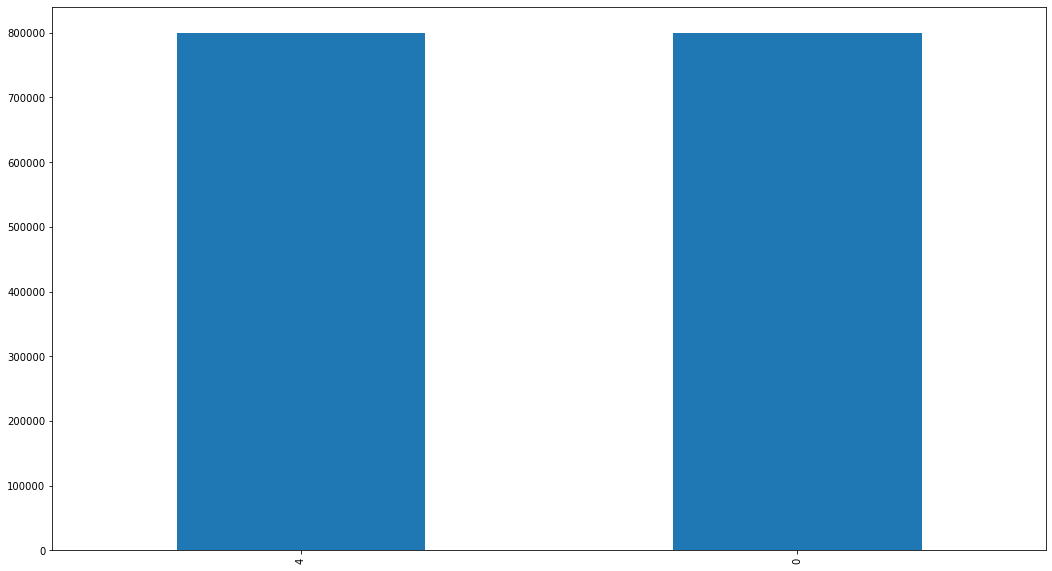

In [8]:
x = sent140.polarity.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

### Graphically summarize the length of the text of the tweet using.

- boxplot
- histogram
- density plot

In [9]:
sent140["len_text_bc"] = sent140["text"].str.len()
sent140["len_text_ac"] = sent140["text_cleaned"].str.len()

In [10]:
pd.options.display.float_format = "{:.2f}".format
sent140[["len_text_bc", "len_text_ac"]].describe()

,len_text_bc,len_text_ac
count,1600000.00,1600000.00
mean,74.09,44.19
std,36.44,24.81
min,6.00,0.00
25%,44.00,24.00
50%,69.00,41.00
75%,104.00,62.00
max,374.00,191.00


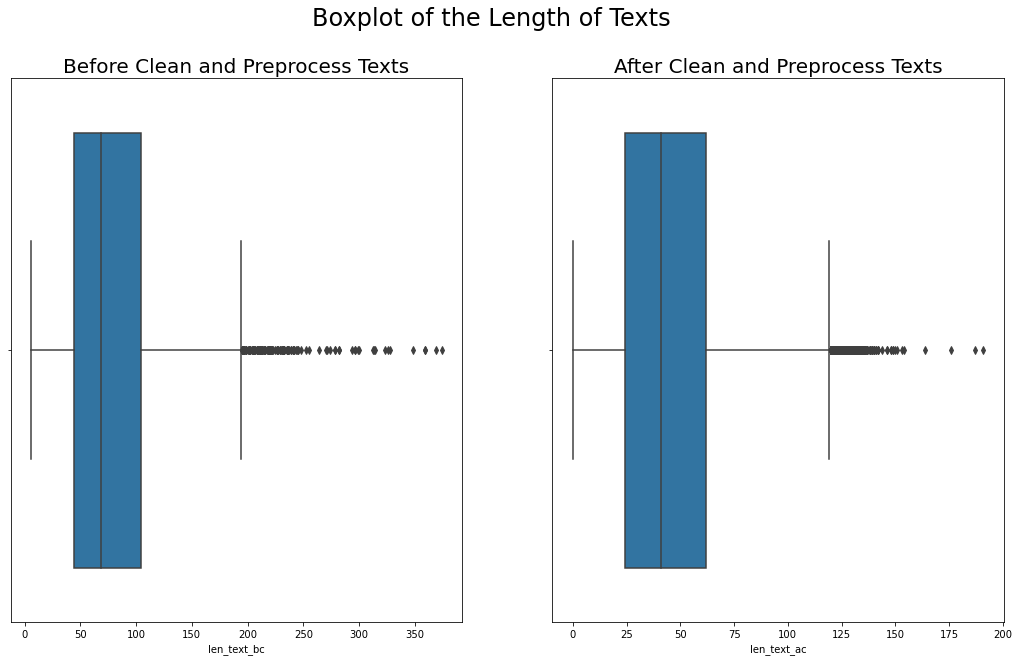

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Boxplot of the Length of Texts', fontsize= 24)

sns.boxplot(ax=axes[0], x=sent140["len_text_bc"])
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.boxplot(ax=axes[1], x=sent140["len_text_ac"])
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

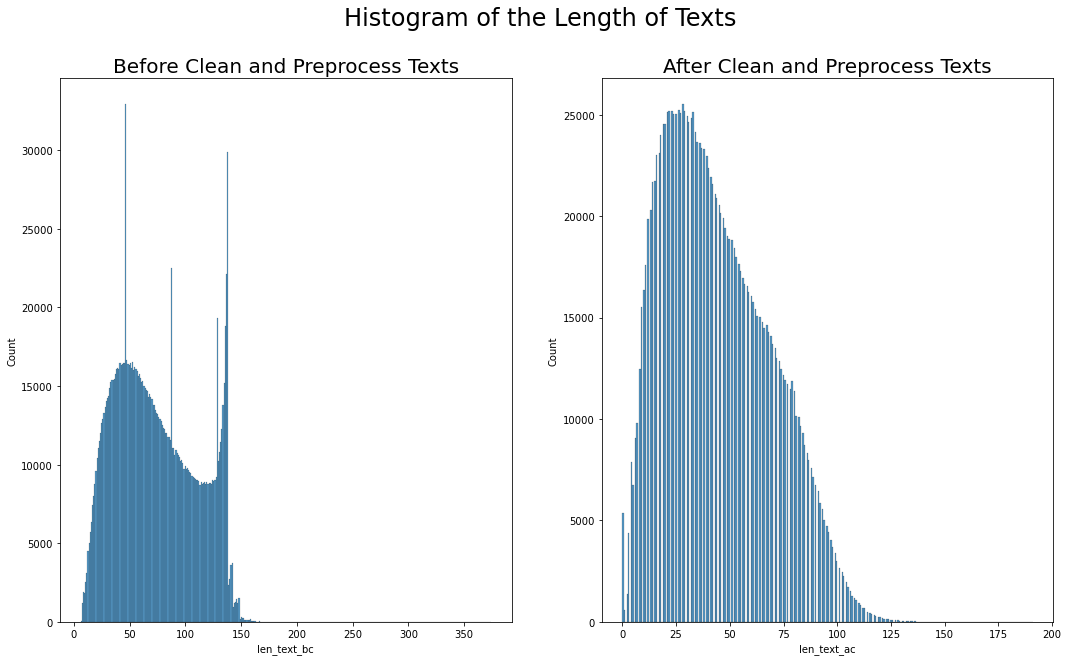

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Histogram of the Length of Texts', fontsize= 24)

sns.histplot(ax=axes[0], data = sent140, x="len_text_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.histplot(ax=axes[1], data = sent140, x="len_text_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

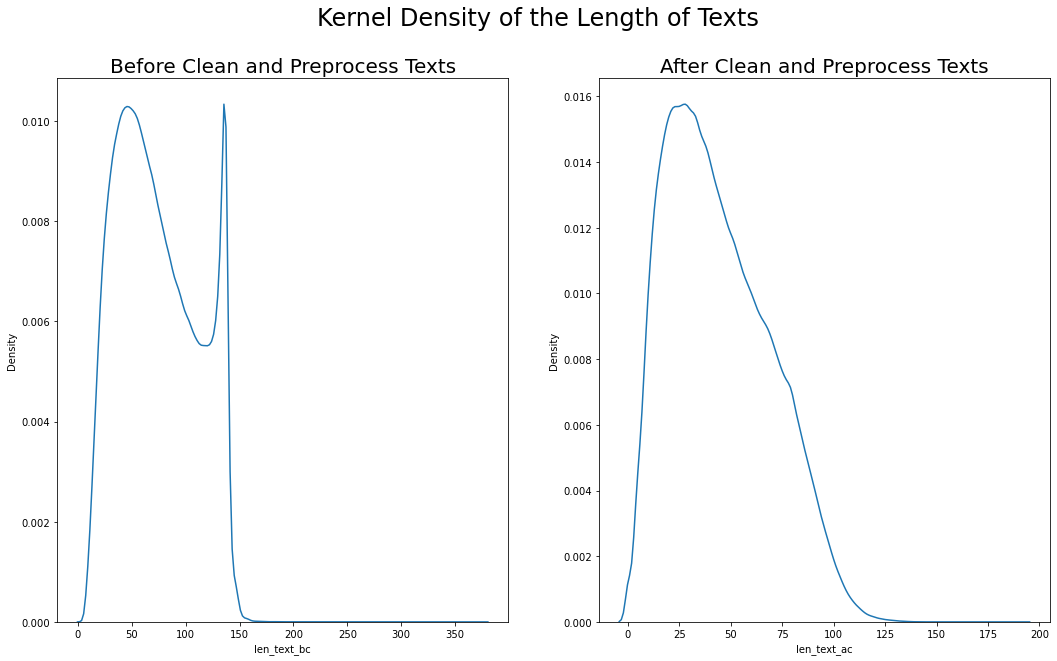

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Kernel Density of the Length of Texts', fontsize= 24)

sns.kdeplot(ax=axes[0], data = sent140, x="len_text_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.kdeplot(ax=axes[1], data = sent140, x="len_text_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

### Graphically summarize the word count of the text of the tweet using

- boxplot
- histogram
- density plot

In [14]:
sent140["count_word_bc"] = sent140["text"].str.split().str.len()
sent140["count_word_ac"] = sent140["text_cleaned"].str.split().str.len()

In [15]:
pd.options.display.float_format = "{:.2f}".format
sent140[["count_word_bc", "count_word_ac"]].describe()

,count_word_bc,count_word_ac
count,1600000.00,1600000.00
mean,13.18,8.02
std,6.96,4.47
min,1.00,0.00
25%,7.00,4.00
50%,12.00,7.00
75%,19.00,11.00
max,64.00,50.00


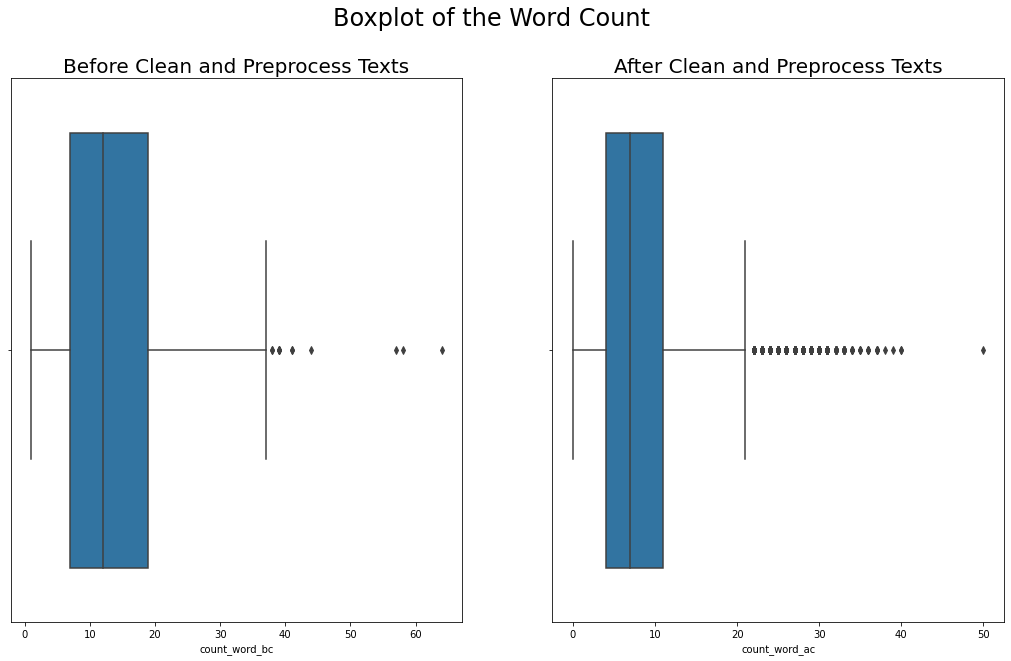

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Boxplot of the Word Count', fontsize= 24)

sns.boxplot(ax=axes[0], x=sent140["count_word_bc"])
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.boxplot(ax=axes[1], x=sent140["count_word_ac"])
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

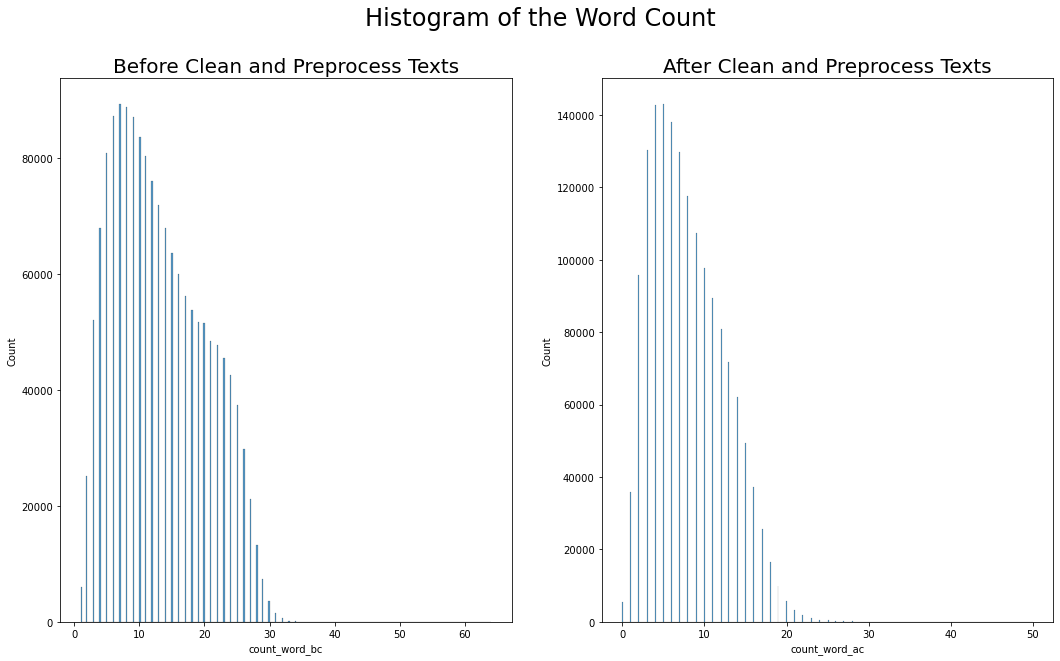

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Histogram of the Word Count', fontsize= 24)

sns.histplot(ax=axes[0], data = sent140, x="count_word_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.histplot(ax=axes[1], data = sent140, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

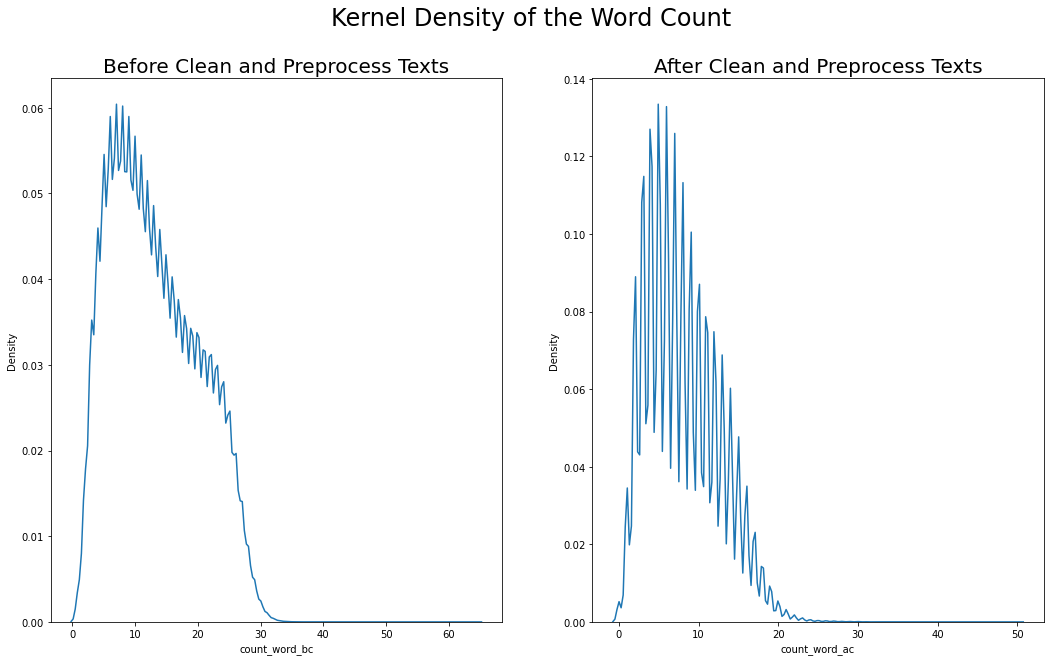

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Kernel Density of the Word Count', fontsize= 24)

sns.kdeplot(ax=axes[0], data = sent140, x="count_word_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.kdeplot(ax=axes[1], data = sent140, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

### Graphically summarize the top 10 bigrams (2-gram) of the tf-idf of the text of the tweet.

In [19]:
def get_top_tf_idf_words(df = sent140, col = "text", use_idf = True, ngram_range =(2, 2), top_n= 5):
    
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    feature_names = np.array(tf_idf.get_feature_names())
    tf_idf_sparse_matrix = tf_idf.transform(df[col])
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]

    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx],
    })

top_n = 10

df_text_bc = get_top_tf_idf_words(df = sent140, col = "text", top_n= top_n)
df_text_ac = get_top_tf_idf_words(df = sent140, col = "text_cleaned", top_n= top_n)

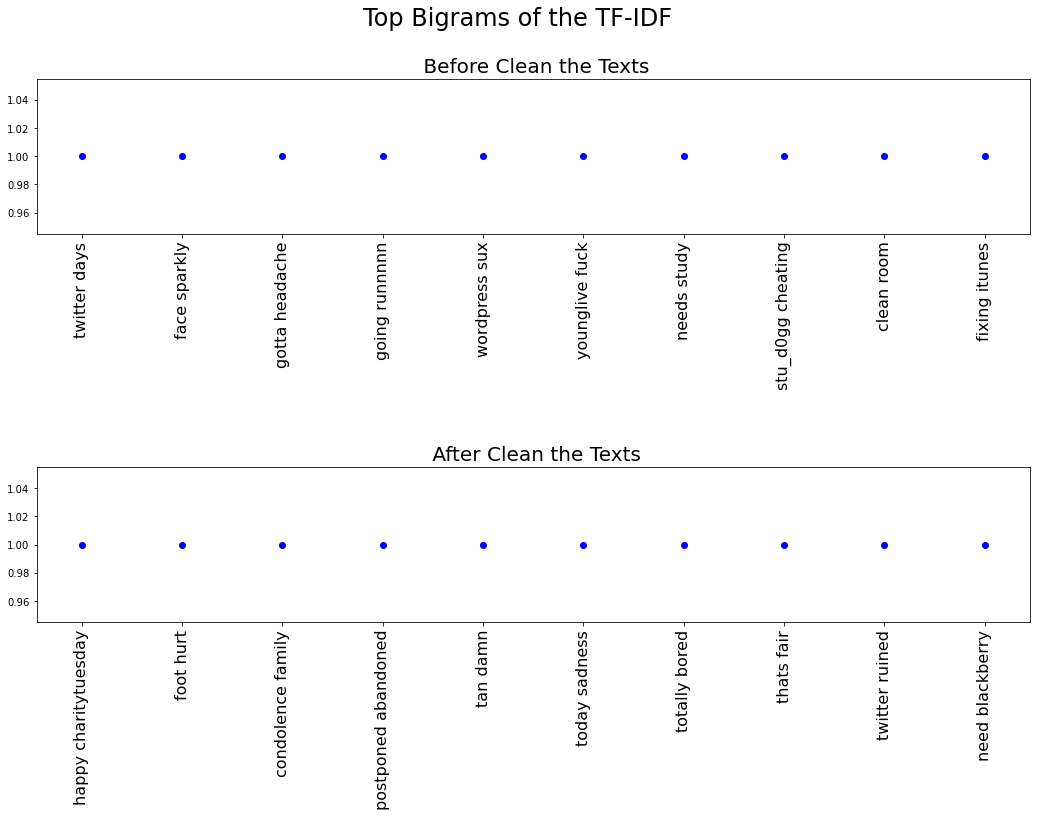

In [20]:
x=range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))
fig.suptitle('Top Bigrams of the TF-IDF', fontsize= 24)


ax[0].plot(x, df_text_bc.tf_idf, 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
ax[0].set_xticks(x)
x_ticks_labels = df_text_bc.feature
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

ax[1].plot(x, df_text_ac.tf_idf, 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
ax[1].set_xticks(x)
x_ticks_labels = df_text_ac.feature
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

fig.subplots_adjust(hspace=1.5)
plt.show()

### Visualize the top 10 term frequency of the tokens associated with negative tweets using scattertext.


In [21]:
nlp = st.WhitespaceNLP.whitespace_nlp

corpus_bc = st.CorpusFromPandas(sent140, 
                              category_col='polarity', 
                              text_col='text',
                              nlp=nlp).build()

corpus_ac = st.CorpusFromPandas(sent140, 
                              category_col='polarity', 
                              text_col='text_cleaned',
                              nlp=nlp).build()

In [22]:
term_freq_df_bc = corpus_bc.get_term_freq_df()

term_freq_df_bc['Negative Score'] = corpus_bc.get_scaled_f_scores(0)

term_freq_df_bc_freq = term_freq_df_bc.sort_values(by= '0 freq', ascending=False)
term_freq_df_bc_Score = term_freq_df_bc.sort_values(by= 'Negative Score', ascending=False)

term_freq_df_ac = corpus_ac.get_term_freq_df()
term_freq_df_ac['Negative Score'] = corpus_ac.get_scaled_f_scores(0)

term_freq_df_ac_freq = term_freq_df_ac.sort_values(by= '0 freq', ascending=False)
term_freq_df_ac_Score = term_freq_df_ac.sort_values(by= 'Negative Score', ascending=False)

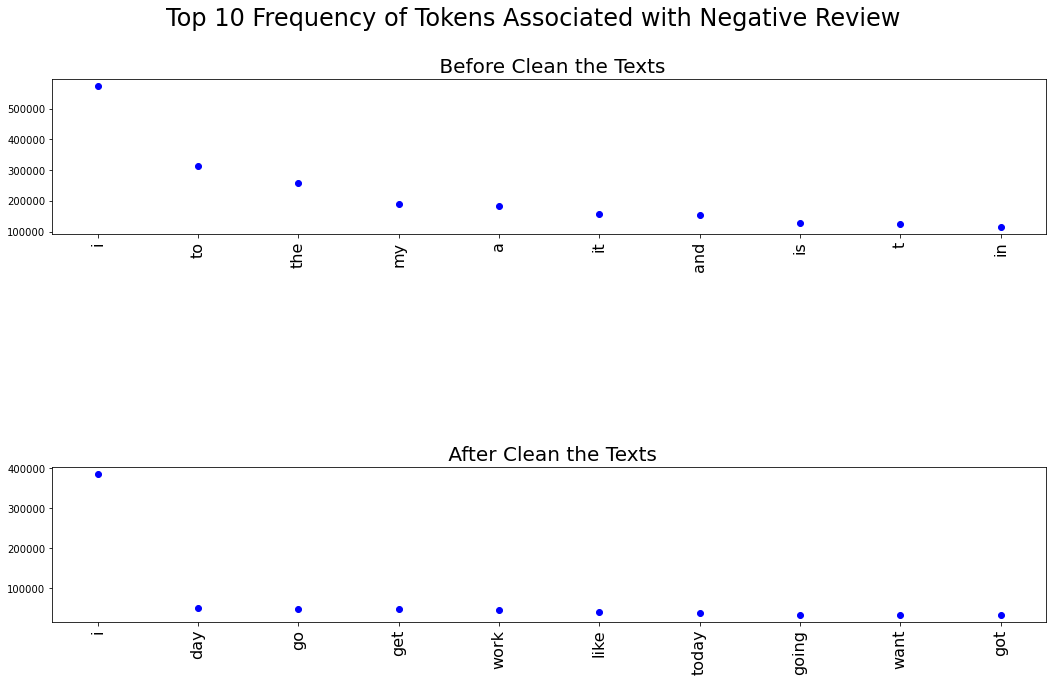

In [23]:
top_n = 10
term_freq_df_ac_freq = term_freq_df_ac_freq.head(10)
term_freq_df_bc_freq = term_freq_df_bc_freq.head(10)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))
fig.suptitle('Top 10 Frequency of Tokens Associated with Negative Review', fontsize= 24)

ax[0].plot(x, term_freq_df_bc_freq["0 freq"], 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
ax[0].set_xticks(x)
x_ticks_labels = term_freq_df_bc_freq.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

ax[1].plot(x, term_freq_df_ac_freq["0 freq"], 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
ax[1].set_xticks(x)
x_ticks_labels = term_freq_df_ac_freq.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

fig.subplots_adjust(hspace=1.5)
plt.show()

### Visualize the top 10 negative scores of the tokens associated with negative tweets using scattertext.

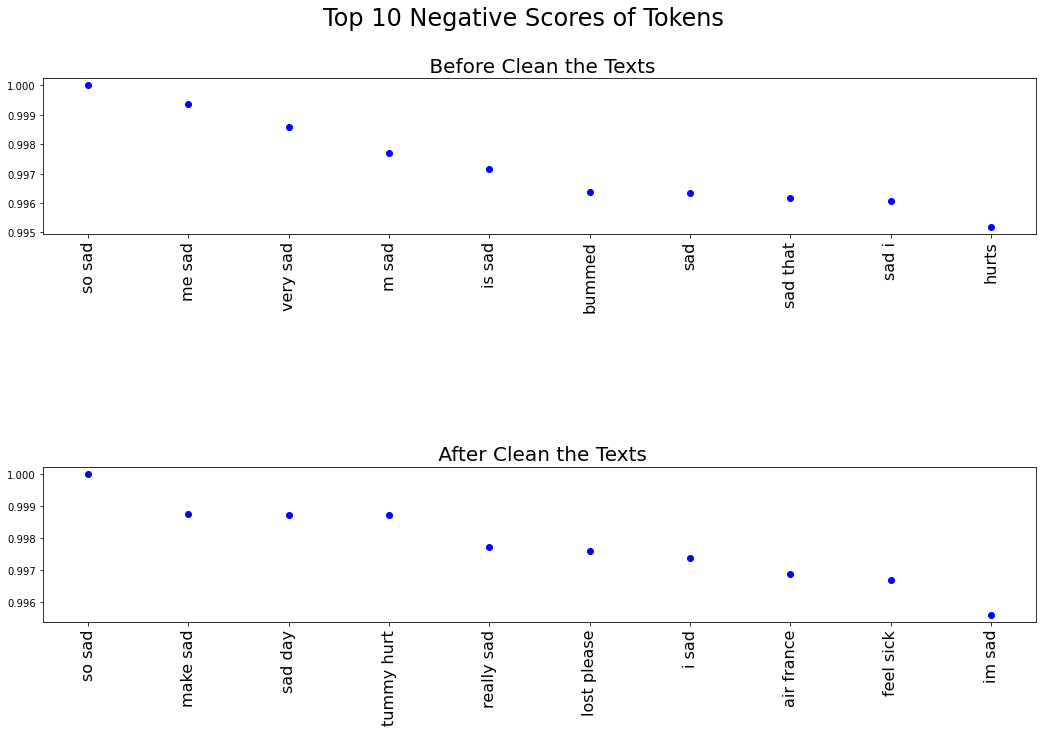

In [24]:
top_n = 10
term_freq_df_ac_Score = term_freq_df_ac_Score.head(10)
term_freq_df_bc_Score = term_freq_df_bc_Score.head(10)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))
fig.suptitle('Top 10 Negative Scores of Tokens', fontsize= 24)

ax[0].plot(x, term_freq_df_bc_Score["Negative Score"], 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
ax[0].set_xticks(x)
x_ticks_labels = term_freq_df_bc_Score.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

ax[1].plot(x, term_freq_df_ac_Score["Negative Score"], 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
ax[1].set_xticks(x)
x_ticks_labels = term_freq_df_ac_Score.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

fig.subplots_adjust(hspace=1.5)
plt.show()